<a href="https://colab.research.google.com/github/liangjieyu123/CropIntensity/blob/main/liner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
x=torch.rand([500,1]).to(device)
y_true = 3*x+0.8

In [ ]:
class Myliner (nn.Module):
  def __init__(self) -> None:
    super(Myliner,self).__init__()
    self.liner = nn.Linear(1,1)
  def forward(self,x):
    out = self.liner(x)
    return out

In [ ]:
myliner = Myliner().to(device)
optimizer = SGD(myliner.parameters(),0.01)
loss_fn = nn.MSELoss()

In [ ]:
for i in range(2000):
  y_pre = myliner(x)
  # print(y_pre)
  # break
  loss = loss_fn(y_pre,y_true)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if i%500 == 0 :
    params = list(myliner.parameters())
    print(loss.item(),params[0].item(),params[1].item())

6.3181657791137695 0.8715946674346924 -0.46791723370552063
0.02805846929550171 2.4065113067626953 1.1290357112884521
0.008313522674143314 2.6769485473632812 0.9791053533554077
0.0024632615968585014 2.824153423309326 0.897492527961731


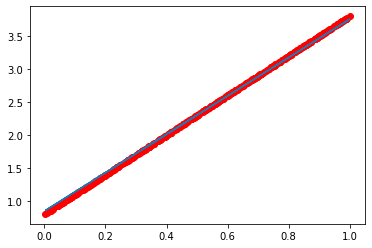

In [ ]:
myliner.eval()
predict=myliner(x)
predict=predict.data.numpy()
plt.scatter(x.data.numpy(),y_true.data.numpy(),c="r")
plt.plot(x.data.numpy(),predict)
plt.show()
